In [313]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [314]:
# Function to initialize N positions randomly inside a unit circle
def initialize(N):
    p = []
    while len(p) < N:
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            p.append([x, y])
    return np.array(p)

In [315]:
# Function to perturb the position of one particle
def perturb(sigma):
    return np.random.normal(0, sigma)

In [316]:
# Function to check whether particles are within a unit circle
def in_circle(p):
    return np.sum(p**2) <= 1

In [317]:
# Function to calculate the energy of the system
def energy(p):
    E = 0
    for i in range(len(p)):
        for j in range(i+1, len(p)):
            E += np.linalg.norm(p[i] - p[j])
    return E

In [318]:
# Function to calculate the direction of the force on a particle
def force(p, i):
    f = np.zeros(2)
    for j in range(len(p)):
        if j != i:
            f += (p[i] - p[j]) / np.linalg.norm(p[i] - p[j])**3
    return f

In [319]:
# Function to induce perturbations on the system
def perturb_system(p, sigma):
    for i in range(len(p)):
        p[i] += perturb(sigma)
    return p

In [320]:
# Function to induce one perturbation on the system
def perturb_one(p, i, sigma):
    p_new = np.copy(p)
    if i < len(p):
        particle = p[i]
        rotation = np.array[[np.sqrt(3)/2, -1/2], [1/2, np.sqrt(3)/2]]
        perturbation = force(p, i)*perturb(sigma)
        while not in_circle(particle + perturbation): # If the perturbation is too large, rotate and halve it until it is small enough
            perturbation = np.dot(rotation, perturbation)/2.0
        if in_circle(p[i] + perturbation):
            p[i] += perturbation
            return p_new
    else:
        print("Particle number out of range")
        return p

In [321]:
# Function to calculate the acceptance probability
def acceptance_probability(E_old, E_new, T):
    if E_new < E_old:
        return 1
    else:
        return math.exp(-(E_new - E_old) / T)


In [322]:
# Function to plot the positions of the particles
def plot_positions(p):
    fig, ax = plt.subplots()
    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    ax.add_artist(circle)
    ax.scatter(p[:,0], p[:,1], color='red', s=4)
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    plt.axhline(y=0, color='black')
    plt.axvline(x=0, color='black')
    plt.show()

In [323]:
# Function to run the annealing process
def S_A(N, T_max, T,min, cooling_schedule, no_iterations):
    # Initialize positions
    p = initialize(N)

    # Initialize temperature
    T = T_max

    # Annealing process
    while T > T_min: 
        # Initialize energy
        E = energy(p)

        sigma = T/T_max

        # Markov chain
        for _ in range(no_iterations):
            for i in range(N):
                # Calculate force on particle
                f = force(p, i)

                # Find perturbed position
                p_new = perturb_one(p, i, sigma)            

                # Calculate new energy
                E_new = energy(p_new)

                # Calculate acceptance probability
                if acceptance_probability(E, E_new, T) > np.random.uniform(0, 1):
                    p = p_new
                    E = E_new

        # Cool system
        T *= cooling_schedule

    # Plot final positions
    plot_positions(p)

In [324]:
particles = 2
max_temp = 2000
min_temp = 5
alpha = 0.9
iterations = 100

S_A(particles, max_temp, min_temp, alpha, iterations)


TypeError: S_A() missing 1 required positional argument: 'no_iterations'

In [ ]:
S_A(2, 2000, 5, 0.9, 100)

TypeError: S_A() missing 1 required positional argument: 'no_iterations'

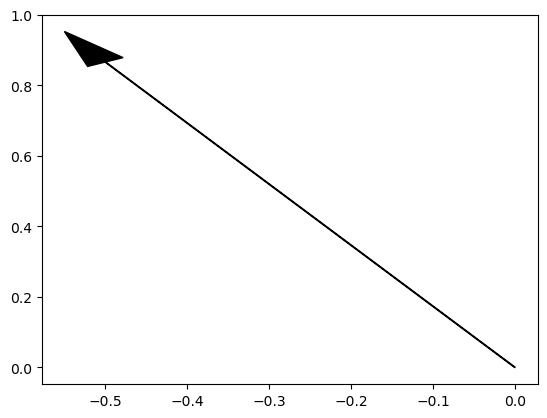

In [ ]:
A = [1,0]
R = [[np.sqrt(3)/2, -1/2], [1/2, np.sqrt(3)/2]]
A = np.dot(R,A)
A = np.dot(R,A)
A = np.dot(R,A)
A = np.dot(R,A)
plt.arrow(0, 0, A[0], A[1], head_width=0.05, head_length=0.1, fc='k', ec='k')